In [1]:
%%html
<iframe width="888" height="500" src='//players.brightcove.net/3663210762001/XCI1AMd08_default/index.html?videoId=6154734593001' allowfullscreen frameborder=0></iframe>

### Electron microscopy

<p><div style="text-align: justify">
Electron microscopy (EM) is a technique for obtaining high resolution images of biological and non-biological specimens. It is used in biomedical research to investigate the detailed structure of tissues, cells, organelles and macromolecular complexes. EM images provide key information on the structural basis of cell function and of cell disease.
</div></p>
    
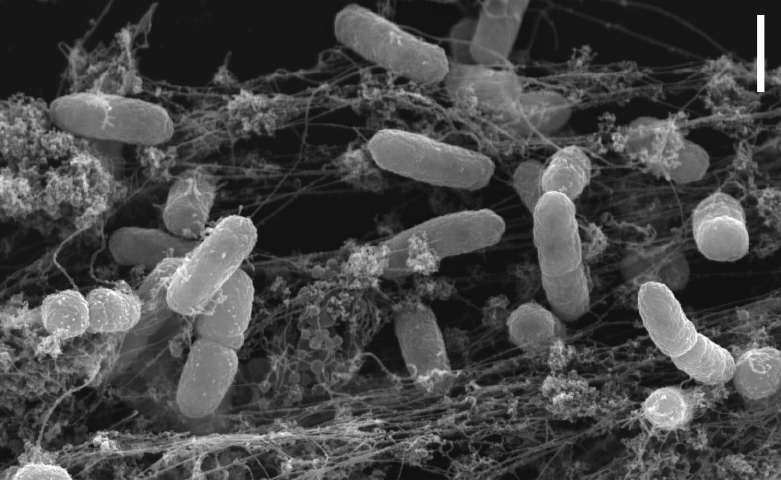


### Electron microscope

<p><div style="text-align: justify">
An electron microscope is a microscope that uses a beam of accelerated electrons as a source of illumination. As the wavelength of an electron can be up to 100,000 times shorter than that of visible light photons, electron microscopes have a higher resolving power than light microscopes and can reveal the structure of smaller objects.
</div></p>

  
<p><div>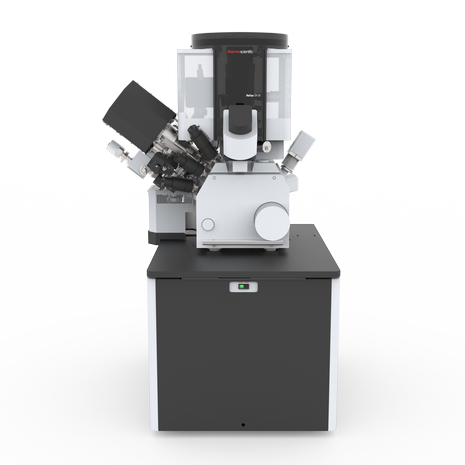</div></p>

### Patent

#### METHOD OF ALIGNING A CHARGED PARTICLE BEAM APPARATUS

<p><div style="text-align: justify">
The invention relates to a method of aligning a charged particle
beam apparatus, as well as to a charged particle beam apparatus having a
processing unit for performing such a method.
</div></p>
  
<p><div style="text-align: justify">  
The charged particle beam apparatus may in principle be any
apparatus that uses charged particles, such as electrons, protons and/or ions, for
generating a beam that is used, for example, to illuminate an object of interest. The
charged particle beam may be used for studying a sample, inspecting an object,
and/or removing parts of said object. Applications include, for example, Transmission
Electron Microscopy, Scanning Electron Microscopy, (Plasma) Focused Ion Beam
technology, and Lithography technology.
</div></p>

<p><div style="text-align: justify">    
In many of these charged particle beam apparatuses, an alignment
of the charged particle beam is necessary. For example, in Transmission Electron
Microscopy (TEM) the electron beam needs to be focussed such that the object of
interested is illuminated with a parallel beam, and then the transmitted beam is
focused onto a detector. In Scanning Electron Microscopy, the electron beam is
focussed into a small point onto the object, and the beam is scanned over the object
and resulting secondary radiation is detected for examining the object of interest. For
achieving high quality results, alignment of the charged particle beam apparatus is
required.
</div></p>

<p><div style="text-align: justify">    
Alignment of a charged particle beam apparatus has proven to be
very difficult and requires a high level of expertise from an operator to be achieved in
a quick and reliable manner. For example, in a TEM, the alignment involves one or
more of the following parameters and operations: setting the gun and condenser
system, condenser aperture, choose the specimen height (eucentric height), get the
beam shifts and tilts pivoting correctly, get the beam tilted accurately down the optic
axis of objective lens (rotation centre, objective aperture, if required), and refine the focus of the diffraction lens, correct astigmatism for each lens appropriately at each
point. Alignment in a TEM may require a couple of iterations to achieve a desired
end result, which takes a lot of time and is prone to making mistakes.
</div></p>

<p><div style="text-align: justify">    
To this end, it is an object of the invention to provide a method with
which the alignment of the charged particle beam apparatus is improved, in
particular in terms of ease of use, accuracy and/or speed. It is furthermore an object
of the invention to provide a charged particle beam apparatus that has the above
qualities.
</div></p>

## ...

<p><div style="text-align: justify">    
Agents may be trained according to the procedure described in claim 5. Method of curriculum training maintains two populations (also referred to as teams) of agents. First team (also referred to as the alignment team) of the agents is trained to align a charged particle beam apparatus, whilst the second team (also referred to as the misalignment team) is trained to misalign the apparatus. Method of curriculum training is a zero-sum game. At each iteration, the alignment team agent performs the alignment of a charged particle beam apparatus. The quality parameters related to the performed alignment are computed. The misalignment team agent provides a charged particle beam apparatus to a such state that is difficult for the alignment team agent to perform the alignment from. The agents are modified according to the following rule. Value of the utility function of the alignment team agent is computed based on the quality parameters related to the performed alignment. Value of the utility function of the misalignment team agent is a negative value of the utility function of the alignment team agent. Thus, the agents are trained in the adversarial manner. Competition between two teams of agents leads to the gradual improvement of the quality of actions performed by the agents. The procedure of modification of the agents may be formulated as the reinforcement learning task. In this case, the computed quality parameters related to the performed alignment correspond to the rewards provided to the agent. Trainable parameters of the agents' neural networks are updated in such a way that the qualitative (highly rewarded) actions become more probable and the deficient (low rewarded) actions become less probable.
</div></p>

## ...



### Defocus lens alignment ###

<p><div style="text-align: justify">    
Electron beam is focused by the electrostatic lens L1 (defocus lens). The agent is trained to adjust the voltage on the defocus lens in order to focus the beam on the surface of the specimen. Focused beam provides a sharp image of the specimen.
</div></p>

<p><div>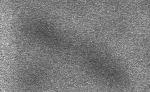</div></p>

### Simulator

<p><div style="text-align: justify">    
Defocus simulator approximates the dynamics of the defocus lens of the electron microscope.
</div></p>

<p><div style="text-align: justify">        
Simulator allows to pretrain the reinforcement learning agents without physical interaction with a microscope. The agent acquires the initial knowledge in the simulated environment, hyperparameters are tuned. The pretrained agent is deployed on the microscope. Training procedure continues on the microscope, the agent adapts to the dynamics of the physical apparatus. Trained agent is able to outperform the human expert in the number of alignment tasks.
</div></p>

### Training

<p><div style="text-align: justify">        
Simulator engine comprises 2000 of simulated alignment scenarios. Training procedure maintains two entities: Trainer and Automatic Aligner. Trainer is an algorithm that schedules the training procedure, selects the alignment scenarios, misaligns the microscope, gradually adjusts the complexity of the alignment and provides the rewards to the AutomaticAligner in response to the performed alignment actions. AutomaticAligner is the reinfocement learning agent that is trained to perform the alignment.
</div></p>
   
The iteration of the training procedure comprises following steps:
<ul>
<li>Trainer selects the alignment scenario. Initial state of the simulator corresponds to the aligned state of the microscope.</li>
<li>Trainer adjusts the complexity of the alignment scenario and misaligns the microscope simulator.</li>
<li>Agent observes the state of the microscope simulator and infers the alignment action.</li>
<li>Alignment action is executed affecting the state of the microscope simulator.</li>
<li>Trainer computes the rewards, alignment trainsition is stored.</li>
<li>The neural networks underlying the inference mechanism of the agent are updated according to the procedure determined by the reinforcement learning algorithm.</li>
</ul>

<p><div style="text-align: justify">        
Following code provides an example of the training of the reinfocement learning agent in the defocus lens alignment simulator. Agent interacts with a partially observable environment, derives the hidden variables and maintains the history of observations. Some of the alignment states may be more improtant than others, so the agent utilizes the attention mechanism (implemented as Gaited Transformer NN architecture) in order to infer the correct alignment action. Agent operates in the continous domain (continous action space) and recieves the rewards proportional to the improvement of the alignment state.
</div></p>

### Requirements:

#### Training in a defocus lens alignment simulator requires the installation of the following packages:

<ul>
<li>tensorflow-gpu==1.15.0</li>
<li>gym</li>
<li>stable-baselines</li>
</ul>

In [2]:
import gym
import pickle
import numpy as np
import tensorflow as tf
from copy import deepcopy
from gym.envs.registration import register
from gym import spaces
from stable_baselines.sac.policies import SACPolicy, mlp, gaussian_likelihood, gaussian_entropy, apply_squashing_func
from stable_baselines import SAC

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
"""@package docstring
Defocus lens alignment simulator: OpenAI gym format.
"""

class MicroscopeStateCorrection():
        def __init__(self, coordinates_correction, reset=False, new_initial_state=False):
            self.coordinates_correction = coordinates_correction
            self.reset = reset
            self.new_initial_state = new_initial_state
            

class MicroscopeState():
        def __init__(self, physical_coordinates, value, performed_correction, out_of_boundary_exception):
            self.physical_coordinates = physical_coordinates
            self.value = value
            self.performed_correction = performed_correction
            self.out_of_boundary_exception = out_of_boundary_exception


class DefocusSimulator():
    """
    Defocus lens.
    """
    def __init__(self):
        self._simulated_episodes = None
        self._num_of_simulated_episodes = None
        self._actual_simulated_episode = None
        self._actual_simulated_episode_idx = 0

        self._min_coordinates=None
        self._max_coordinates=None
        self._min_value=None
        self._max_value=None
       
        self._load_simulated_data()
        self._define_simulated_data_ranges()

        
    def _load_simulated_data(self):
        with open('simulator_data.pickle', 'rb') as f:
            self._simulated_episodes = pickle.load(f)[0:1]
        self._num_of_simulated_episodes = len(self._simulated_episodes)


    def _define_simulated_data_ranges(self):
        self._min_coordinates = self._simulated_episodes[0]['grid_coordinates'][0][0]
        self._max_coordinates = self._simulated_episodes[0]['grid_coordinates'][0][-1]
        self._min_value = 0
        self._max_value = 1


    def _check_coordinates_are_within_allowed_range(self, physical_coordinates):      
        out_of_boundary_exception = np.any(physical_coordinates > self._max_coordinates or physical_coordinates < self._min_coordinates)
        physical_coordinates = np.clip(physical_coordinates, self._min_coordinates, self._max_coordinates)
        return physical_coordinates, out_of_boundary_exception


    def _convert_physical_coordinates_to_grid_indices(self, physical_coordinates):
        grid_coordinates = tuple((physical_coordinates - self._actual_simulated_episode['origin']).astype('int'))
        return grid_coordinates


    def get_aligned_state_data(self):
        return self._actual_simulated_episode['aligned_state_coordinates'], self._actual_simulated_episode['aligned_state_value']


    def switch_simulated_episode(self):
        self._actual_simulated_episode_idx += 1
        self._actual_simulated_episode_idx = self._actual_simulated_episode_idx % self._num_of_simulated_episodes
        self._actual_simulated_episode = self._simulated_episodes[self._actual_simulated_episode_idx]


    def get_state(self, physical_coordinates):
        physical_coordinates, out_of_boundary_exception = self._check_coordinates_are_within_allowed_range(physical_coordinates)
        grid_indices = self._convert_physical_coordinates_to_grid_indices(physical_coordinates)
        value = np.array([self._actual_simulated_episode['values'][grid_indices]])
        return physical_coordinates, value, out_of_boundary_exception


    def get_simulated_surface(self):
        grid_coordinates = self._actual_simulated_episode['grid_coordinates'][0]
        values = self._actual_simulated_episode['values']
        return grid_coordinates, values



class Microscope():
    """
    Microscope basic functionality at the "server side".
    """
    def __init__(self):   
        self._defocus_system = DefocusSimulator()
        self._initial_physical_coordinates = None
        self._physical_coordinates = None
        self._value = None
        self._performed_correction = None
        self._out_of_boundary_exception = None

    def _select_new_initial_state(self):
        self._defocus_system.switch_simulated_episode()
        self._initial_physical_coordinates, self._value = self._defocus_system.get_aligned_state_data()

    def _reset(self):
        self._physical_coordinates = copy.deepcopy(self._initial_physical_coordinates)
        self._performed_correction = np.zeros_like(self._physical_coordinates)

    def _perform_microscope_state_correction(self, microscope_state_correction):
        physical_coordinates_teor = self._physical_coordinates + microscope_state_correction.coordinates_correction
        physical_coordinates_real, self._value, self._out_of_boundary_exception = self._defocus_system.get_state(physical_coordinates_teor)
        self._performed_correction = physical_coordinates_real - self._physical_coordinates
        self._physical_coordinates = physical_coordinates_real
    
    def correct_state(self, microscope_state_correction):
        if microscope_state_correction.new_initial_state:
            self._select_new_initial_state()
        elif microscope_state_correction.reset:
            self._reset()
        else:
            self._perform_microscope_state_correction(microscope_state_correction)

    def get_state(self):
        return MicroscopeState(physical_coordinates=self._physical_coordinates, value=self._value, performed_correction=self._performed_correction, out_of_boundary_exception=self._out_of_boundary_exception)

    
#Server
#-----------------------------------------------------------
#Client
         

class ObservedInfo():
    """
    Information observed by the Agent at each alignment timestep.
    """
    def __init__(self, action_desired, action_performed, touches_to_search_space_boundaries, blurriness, out_of_boundary_exception):
        self.action_desired = action_desired
        self.action_performed = action_performed
        self.touches_to_search_space_boundaries = touches_to_search_space_boundaries
        self.blurriness = blurriness
        self.out_of_boundary_exception = out_of_boundary_exception


    def to_np_array(self):
        return np.concatenate([self.action_performed, self.touches_to_search_space_boundaries])


class DerivedInfo():
    """
    Information derived by the Agent at each alignment timestep.
    """
    def __init__(self, action_overall, min_blurriness_overall, max_blurriness_overall, blurriness_difference_previous_actual, defocus_relative):
        self.action_overall = action_overall
        self.min_blurriness_overall = min_blurriness_overall
        self.max_blurriness_overall = max_blurriness_overall
        self.defocus_relative = defocus_relative
        self.blurriness_difference_previous_actual = blurriness_difference_previous_actual
        

    def to_np_array(self):
        return np.concatenate([self.blurriness_difference_previous_actual, self.defocus_relative])


class SecretInfo():
    """
    SecretInfo is tracked by the Trainer and is provided only for the critic neural networks during the training.
    SecretInfo is not visible for the policy neural network.
    """
    def __init__(self, action_to_achieve_aligned_state):
        self.action_to_achieve_aligned_state = action_to_achieve_aligned_state

    def to_np_array(self):
        return np.concatenate([self.action_to_achieve_aligned_state])
        

class TimeStep():
    """
    Information available at each alignment timestep.
    """
    def __init__(self, observed_info=None, derived_info=None, secret_info=None):
        self.observed_info = observed_info
        self.derived_info = derived_info
        self.secret_info = secret_info



class AlignmentHistory():
    """
    Alignment workflow history.
    """
    @property
    def is_empty(self):
        return len(self._timesteps) == 0

    @property
    def timesteps(self):
        return self._timesteps

    @property
    def last_timestep(self):
        return self._timesteps[-1]

    @property
    def initial_timestep(self):
        return self._timesteps[1]

    @property
    def actual_timestep(self):
        return self._actual_timestep

    def reset(self):
        self._actual_timestep = TimeStep()
        self._timesteps = []
        self._timesteps_np_array = np.array([], dtype='float64')

    def write_observed_info(self, observed_info):
        self._actual_timestep.observed_info = observed_info

    def write_derived_info(self, derived_info):
        self._actual_timestep.derived_info = derived_info

    def write_secret_info(self, secret_info):
        self._actual_timestep.secret_info = secret_info

    def capture_actual_timestep(self):
        self._timesteps.append(copy.deepcopy(self._actual_timestep))
        self._timesteps_np_array = np.concatenate([self._timesteps_np_array, self._actual_timestep.observed_info.to_np_array(), self._actual_timestep.derived_info.to_np_array(), self._actual_timestep.secret_info.to_np_array()])
        self._actual_timestep = TimeStep()

    def to_np_array(self):
        return self._timesteps_np_array

              

class ActionConvertor():
    """
    ActionConvertor scales the policy neural network logits (range [-1;1]) to the physical quantities range (observation space).
    """
    def __init__(self, history, alignment_settings):
        self._history = history
        self._sensitivity = alignment_settings.sensitivity
        self._search_space = alignment_settings.search_space

    def clip_action_if_search_space_boundaries_are_touched(self, action):
        action_overall = self._history.last_timestep.derived_info.action_overall + action      
        touches = (action_overall > self._search_space.high or action_overall < self._search_space.low).astype('float32')
        action_overall_clipped = np.clip(action_overall, self._search_space.low, self._search_space.high)
        action = action - (action_overall - action_overall_clipped)
        return action, touches

    def convert_action_to_state_correction(self, action):
        return action * self._sensitivity

    def convert_state_correction_to_action(self, state_correction):
        return state_correction / self._sensitivity    




class MicroscopeControl():
    """
    Microscope basic functionality at the "client" side.
    """
    def __init__(self, action_convertor):
        self._microscope = Microscope()
        self._action_convertor = action_convertor

    def select_new_alignment_scenario(self):
        self._microscope.correct_state(MicroscopeStateCorrection(coordinates_correction=None, reset=False, new_initial_state=True))

    def reset(self):
        self._microscope.correct_state(MicroscopeStateCorrection(coordinates_correction=None, reset=True, new_initial_state=False))
        microscope_state = self._microscope.get_state()
        performed_alignment_action = self._action_convertor.convert_state_correction_to_action(microscope_state.performed_correction)
        return ObservedInfo(action_desired=np.zeros_like(performed_alignment_action), action_performed=performed_alignment_action, touches_to_search_space_boundaries=np.zeros_like(performed_alignment_action), blurriness=microscope_state.value, out_of_boundary_exception=microscope_state.out_of_boundary_exception)

    def perform_alignment_action(self, action):
        action_clipped, touches = self._action_convertor.clip_action_if_search_space_boundaries_are_touched(action)
        correction = self._action_convertor.convert_action_to_state_correction(action_clipped)
        self._microscope.correct_state(MicroscopeStateCorrection(coordinates_correction=correction, reset=False, new_initial_state=False))
        microscope_state = self._microscope.get_state()
        performed_alignment_action = self._action_convertor.convert_state_correction_to_action(microscope_state.performed_correction)
        return ObservedInfo(action_desired=action, action_performed=performed_alignment_action, touches_to_search_space_boundaries=touches, blurriness=microscope_state.value, out_of_boundary_exception=microscope_state.out_of_boundary_exception)




class Trainer():
    """
    Trainer prepares alignment scenario and assesses the quality of the alignment actions performed by the AutomaticAligner (Agent).
    Trainer saves the initial (aligned) state and misaligns the microscope.
    Agent is then required to perform the alignment procedure.
    """
    def __init__(self, microscope_control, history, alignment_settings):
        self._microscope_control = microscope_control
        self._history = history
        self._alignment_settings = alignment_settings
        
        self._num_of_performed_actions_within_alignment = 0
        self._num_of_completed_complexity_levels = 0
        self._num_of_completed_alignments = 0
        self._num_of_fails_before_successfull_alignment = 0

        self._alignment_was_completed_successfully = True
        self._time_to_select_new_alignment_scenario = True
        self._time_to_adjust_alignment_complexity = True
        self._time_to_select_new_initial_misalignment = True

        self._initial_misalignment = None
        self._misalignment_range = None
        self._desired_precision = None

        self._define_hyperparameters()
        
    def _define_hyperparameters(self):
        self._num_of_complexity_levels = 2
        self._num_of_alignments_within_complexity_level = 2
        self._num_of_fails_to_start_from_different_initial_misalignment = 2
        self._desired_precision_target = np.array([0.1], dtype='float32')
        self._desired_precision_initial = np.array([0.12], dtype='float32')
        self._misalignment_hardness_target = np.array([0.75], dtype='float32')
        self._misalignment_hardness_initial = np.array([0.15], dtype='float32')

    def _print_alignment_process_initial_settings(self):
        print("************************************")
        print("Starting alignment from new state")
        print("Initial misalignment hardness low: ", self._misalignment_range.low)
        print("Initial misalignment hardness high: ", self._misalignment_range.high)
        print("Desired alignment precision: ", self._desired_precision)
        print("Initial misalignment: ", self._initial_misalignment)
        print("************************************")

    def _check_state_is_valid(self, observed_info):
        state_is_valid = not observed_info.out_of_boundary_exception
        if not state_is_valid:
            print("OUT OF BOUNDARY EXCEPTION")
        return state_is_valid

    def _check_time_expired(self):
        return self._num_of_performed_actions_within_alignment == self._alignment_settings.max_num_of_alignment_actions - 1

    def _check_alignment_is_reliable(self, time_expired, state_is_valid):
        alignment_is_precise = np.all(np.abs(self._history.last_timestep.secret_info.action_to_achieve_aligned_state) < self._desired_precision)
        search_space_boundaries_are_not_touched = np.all(self._history.last_timestep.observed_info.touches_to_search_space_boundaries.astype('bool') == False)
        if time_expired and state_is_valid and alignment_is_precise and search_space_boundaries_are_not_touched:
            self._alignment_was_completed_successfully = True 
    
    def _maybe_select_new_alignment_scenario(self):
        if self._time_to_select_new_alignment_scenario:
            self._microscope_control.select_new_alignment_scenario()
            self._time_to_select_new_alignment_scenario = False

    def _maybe_adjust_alignment_complexity(self):
        if self._time_to_adjust_alignment_complexity:
            self._adjust_initial_misalignment_complexity()
            self._adjust_alignment_desired_precision()
            self._time_to_adjust_alignment_complexity = False

    def _maybe_select_new_initial_misalignment(self):
        if self._time_to_select_new_initial_misalignment:
            self._initial_misalignment = np.sign(np.random.random() - 0.5) * self._misalignment_range.sample()
            self._time_to_select_new_initial_misalignment = False

    def _check_update_times(self):
        if self._alignment_was_completed_successfully:
            if self._num_of_completed_complexity_levels % self._num_of_complexity_levels == 0:
                self._time_to_select_new_alignment_scenario = True
                self._num_of_completed_complexity_levels = 0
            if self._num_of_completed_alignments % self._num_of_alignments_within_complexity_level == 0:
                self._num_of_completed_complexity_levels += 1
                self._time_to_adjust_alignment_complexity = True
                self._time_to_select_new_initial_misalignment = True
            self._num_of_completed_alignments += 1
            self._num_of_fails_before_successfull_alignment = 0
        else:
            self._num_of_fails_before_successfull_alignment += 1
            if self._num_of_fails_before_successfull_alignment % self._num_of_fails_to_start_from_different_initial_misalignment == 0:
                self._time_to_select_new_initial_misalignment = True
                self._num_of_fails_before_successfull_alignment = 0
        self._num_of_performed_actions_within_alignment = 0
        self._alignment_was_completed_successfully = False

    def _reset_microscope(self):
        self._history.reset()
        observed_info = self._microscope_control.reset()
        no_info_yet = np.zeros_like(observed_info.blurriness)
        no_action_yet = np.zeros_like(self._alignment_settings.search_space.low)
        self._history.write_observed_info(observed_info)
        self._history.write_derived_info(DerivedInfo(action_overall=no_action_yet, min_blurriness_overall=no_info_yet, max_blurriness_overall=no_info_yet, blurriness_difference_previous_actual=no_info_yet, defocus_relative=no_info_yet))
        self._history.write_secret_info(SecretInfo(action_to_achieve_aligned_state=no_action_yet))
        self._history.capture_actual_timestep()       

    def _set_initial_misalignment(self):
        while True:
            self._reset_microscope()
            self._maybe_select_new_initial_misalignment()
            initial_observed_info = self._microscope_control.perform_alignment_action(self._initial_misalignment)
            self._initial_misalignment = initial_observed_info.action_performed
            if self._check_state_is_valid(initial_observed_info):
                self._history.write_secret_info(SecretInfo(action_to_achieve_aligned_state=initial_observed_info.action_performed))
                break
            else:
                self._time_to_select_new_initial_misalignment = True

    def _adjust_alignment_desired_precision(self):
        self._desired_precision = self._desired_precision_initial + self._num_of_completed_complexity_levels * (self._desired_precision_target - self._desired_precision_initial) / (self._num_of_complexity_levels)
             
    def _adjust_initial_misalignment_complexity(self):
        step = (self._misalignment_hardness_target - self._misalignment_hardness_initial) / (self._num_of_complexity_levels)
        high = self._misalignment_hardness_initial + self._num_of_completed_complexity_levels * step
        low = high - step
        self._misalignment_range = gym.spaces.Box(low=low, high=high)

    def set_up_initial_conditions(self):
        self._check_update_times()
        self._maybe_select_new_alignment_scenario()
        self._maybe_adjust_alignment_complexity()
        self._set_initial_misalignment()
        self._print_alignment_process_initial_settings()            

    def assess_automatic_aligner_action(self):
        self._num_of_performed_actions_within_alignment += 1
        time_expired = self._check_time_expired()
        state_is_valid = self._check_state_is_valid(self._history.last_timestep.observed_info)
        done = time_expired or not state_is_valid
        self._check_alignment_is_reliable(time_expired, state_is_valid)
        rewards = self._calculate_rewards(done, state_is_valid)
        return rewards, done

    def provide_secret_info(self):
        self._history.write_secret_info(SecretInfo(action_to_achieve_aligned_state=self._history.last_timestep.secret_info.action_to_achieve_aligned_state + self._history.actual_timestep.observed_info.action_performed))

    def _calculate_rewards(self, done, state_is_valid):
        rewards = 0
        rewards += self._calculate_reward_for_microscope_out_of_boundary_exception(state_is_valid)
        rewards += self._calculate_reward_for_touches_to_allowed_search_space_boundaries()
        rewards += self._calculate_reward_for_success(done)
        return 10*rewards

    def _calculate_reward_for_distance_to_target_state(self):
        reward_for_distance_to_target_state = 10 * self._history.last_timestep.derived_info.blurriness_difference_previous_actual
        print("Reward for change of distance to aligned state", reward_for_distance_to_target_state)
        return reward_for_distance_to_target_state

    def _calculate_reward_for_microscope_out_of_boundary_exception(self, state_is_valid):
        print("State is valid?: ", state_is_valid)
        return -5 if not state_is_valid else 0

    def _calculate_reward_for_touches_to_allowed_search_space_boundaries(self):
        boundary_is_touched = np.any(self._history.last_timestep.observed_info.touches_to_search_space_boundaries.astype('bool')) 
        print("Search space boundary touched?: ", boundary_is_touched)
        return -0.1 * np.abs(self._history.last_timestep.observed_info.action_desired - self._history.last_timestep.observed_info.action_performed)

    def _calculate_reward_for_success(self, done):
        reward_for_success = 0
        if done:
            if self._alignment_was_completed_successfully:
                reward_for_success = 1
                reward_for_success += self._calculate_additional_reward_for_precision()
            else:
                reward_for_success += self._calculate_additional_negative_reward_for_final_state_misalignment()
        return reward_for_success

    def _calculate_additional_reward_for_precision(self):
        num_of_bands = 5
        precision_bands = (np.linspace(self._desired_precision, 0, num_of_bands + 1)).reshape(num_of_bands + 1, 1)
        achieved_precision = np.abs(self._history.last_timestep.secret_info.action_to_achieve_aligned_state)[np.newaxis, :]
        additional_reward_for_precision = np.all(achieved_precision <= precision_bands, axis=-1).sum()
        print("Additional reward for precision: ", additional_reward_for_precision)
        return additional_reward_for_precision * 0.1

    def _calculate_additional_negative_reward_for_final_state_misalignment(self):
        return -1 * np.abs(self._history.last_timestep.secret_info.action_to_achieve_aligned_state).max()




class AutomaticAligner():
    """
    Agent performing the microscope alignment.
    """
    def __init__(self, microscope_control, history, alignment_settings):
        self._microscope_control = microscope_control
        self._history = history
        self._alignment_settings = alignment_settings
        self._define_hyperparameters()
        self._define_spaces()

    def _define_spaces(self):
        self._observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self._alignment_settings.max_num_of_alignment_actions * self._len_of_single_timestep_observation,))
        self._action_space = spaces.Box(low=-1, high=1, shape=(1,))

    def get_spaces(self):
        return self._observation_space, self._action_space

    def compose_state_from_observation_history(self):
        start_idx_to_discard_unusable_timesteps = 2 * self._len_of_single_timestep_observation
        history_np = self._history.to_np_array()[start_idx_to_discard_unusable_timesteps:start_idx_to_discard_unusable_timesteps + self._observation_space.shape[0]]
        state = np.zeros(self._observation_space.shape[0])
        state[:history_np.shape[0]] = history_np
        return state

    def _define_hyperparameters(self):
        self._alignment_initial_action = np.array([0.15])
        self._len_of_single_timestep_observation = 5

    def _derive_info(self, observed_info):
        min_blurriness_actual = np.minimum(self._history.last_timestep.derived_info.min_blurriness_overall, observed_info.blurriness)
        max_blurriness_actual = np.maximum(self._history.last_timestep.derived_info.max_blurriness_overall, observed_info.blurriness)
        min_blurriness_last = self._history.last_timestep.derived_info.min_blurriness_overall
        defocus_relative = (min_blurriness_last - observed_info.blurriness) / (max_blurriness_actual - min_blurriness_actual) #[-1;1] . -1 if new max is observed
        
        action_overall = self._history.last_timestep.derived_info.action_overall + observed_info.action_performed
        blurriness_difference_previous_actual=self._history.last_timestep.observed_info.blurriness - observed_info.blurriness     
        return DerivedInfo(action_overall=action_overall, min_blurriness_overall=min_blurriness_actual, max_blurriness_overall=max_blurriness_actual, blurriness_difference_previous_actual=blurriness_difference_previous_actual, defocus_relative=defocus_relative)

    def _write_to_history(self, observed_info, derived_info):
        self._history.write_observed_info(observed_info)
        self._history.write_derived_info(derived_info)

    def observe_initial_state(self):
        no_action_yet = np.zeros_like(self._action_space.low)
        observed_info = self._microscope_control.perform_alignment_action(no_action_yet)
        no_info_yet = np.zeros_like(observed_info.blurriness)
        empty_derived_info = DerivedInfo(action_overall=no_action_yet, min_blurriness_overall=observed_info.blurriness, max_blurriness_overall=observed_info.blurriness, blurriness_difference_previous_actual=no_info_yet, defocus_relative=no_info_yet)
        self._write_to_history(observed_info, empty_derived_info)

    def capture_actual_timestep(self):
        self._history.capture_actual_timestep()

    def perform_initial_action(self):
        self.perform_alignment_step(self._alignment_initial_action)
   
    def perform_alignment_step(self, action):
        observed_info = self._microscope_control.perform_alignment_action(action)
        derived_info = self._derive_info(observed_info)
        self._write_to_history(observed_info, derived_info)



class AlignmentSettings():
    """
    Alignment requirements.
    """
    def __init__(self):
        self.max_num_of_alignment_actions = 8
        self.sensitivity = np.array([500])
        self.search_space = spaces.Box(low=-1, high=1, shape=(1,))



class FocusLensAlignmentEnv(gym.Env):
    """
    OpenAI gym environment simulating the dynamics of the defocus lens.
    """
    def __init__(self):
        super(FocusLensAlignmentEnv, self).__init__()
        self._alignment_settings = AlignmentSettings()
        self._history = AlignmentHistory()
        self._action_convertor = ActionConvertor(self._history, self._alignment_settings)
        self._microscope_control = MicroscopeControl(self._action_convertor)
        self._automatic_aligner = AutomaticAligner(self._microscope_control, self._history, self._alignment_settings)
        self._trainer = Trainer(self._microscope_control, self._history, self._alignment_settings)
        self._define_spaces()
        
    
    def _define_spaces(self):
        self.observation_space, self.action_space = self._automatic_aligner.get_spaces()


    def reset(self):
        print("Reset FocusLensAlignmentEnv")
        self._trainer.set_up_initial_conditions()
        self._automatic_aligner.observe_initial_state()
        self._automatic_aligner.capture_actual_timestep()
        self._automatic_aligner.perform_initial_action()  
        self._trainer.provide_secret_info()
        self._automatic_aligner.capture_actual_timestep()
        return self._automatic_aligner.compose_state_from_observation_history()


    def step(self, action):
        self._automatic_aligner.perform_alignment_step(action)
        self._trainer.provide_secret_info()
        self._automatic_aligner.capture_actual_timestep()
        reward, done = self._trainer.assess_automatic_aligner_action()
        self._print_step_info(action, reward, done)
        return self._automatic_aligner.compose_state_from_observation_history(), reward, done, {}


    def render(self):
        pass


    def _print_step_info(self, action, reward, done):
        print("-------------------------------------------------------")
        print("Step")
        print("Initial misalignment ", self._trainer._initial_misalignment)
        print("Action: ", action)
        print("AutomaticAligner cumulative action ", self._history.last_timestep.derived_info.action_overall)
        print("Desired precision: ", self._trainer._desired_precision)
        print("Reward ", reward)
        print("Done? ", done)
        print("Num of completed alignments: ", self._trainer._num_of_completed_alignments)
        print("Episode was finished successfully? ", self._trainer._alignment_was_completed_successfully)
        print("Out of boundary exception? ", self._history.last_timestep.observed_info.out_of_boundary_exception)
        print("-------------------------------------------------------")
        

In [4]:
"""@package docstring
Implementation of the reinforcement learning algorithm.
"""

EPS = 1e-6
LOG_STD_MAX = 2
LOG_STD_MIN = -20


def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(8, (2 * (i//2)) / np.float32(d_model))
    return pos * angle_rates


def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)    
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])    
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)


def create_padding_mask(seq, timestep_fv_len):
    seq = tf.cast(tf.reduce_all(tf.math.equal(seq, tf.zeros([1, 1, timestep_fv_len])), axis=-1), tf.float32)
    num_masked_timesteps = tf.cast(tf.reduce_sum(seq, axis=-1, keep_dims=True), tf.int32)
    seq = seq[:, tf.newaxis, tf.newaxis, :]
    return seq, num_masked_timesteps


def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  
    output = tf.matmul(attention_weights, v)
    return output, attention_weights



class MultiHeadAttention():
    def __init__(self, d_model, num_heads):
        self.num_heads = num_heads
        self.d_model = d_model        
        assert d_model % self.num_heads == 0
        self.depth = d_model // self.num_heads
        

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    

    def __call__(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        
        q = tf.layers.dense(q, units=self.d_model)  
        k = tf.layers.dense(k, units=self.d_model) 
        v = tf.layers.dense(v, units=self.d_model) 
        
        q = self.split_heads(q, batch_size)  
        k = self.split_heads(k, batch_size)  
        v = self.split_heads(v, batch_size)  
        
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = tf.layers.dense(concat_attention, units=self.d_model) 
            
        return output, attention_weights


class PointWiseFeedForwardNetwork():
    def __init__(self, d_model, dff):
        self.d_model = d_model
        self.dff = dff

    def __call__(self, inp):
        x = tf.layers.dense(inp, units=self.dff, activation=tf.nn.relu)
        x = tf.layers.dense(x, units=self.d_model)
        return x
        


class EncoderLayer():
    """
    "Gaited Transformer":
    https://arxiv.org/pdf/1910.06764.pdf
    """
    def __init__(self, d_model, num_heads, dff):    
        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = PointWiseFeedForwardNetwork(d_model, dff)
    
      
    def __call__(self, e_l_m_1, mask):
        e_l_m_1_norm = tf.contrib.layers.layer_norm(e_l_m_1, center=True, scale=True)
        y_bar_l, attention_weights = self.mha(e_l_m_1_norm, e_l_m_1_norm, e_l_m_1_norm, mask)
        gate_mha_weights = tf.layers.dense(e_l_m_1, units=1)
        y_l = e_l_m_1 + (gate_mha_weights * tf.nn.relu(y_bar_l))
                
        e_bar_l = self.ffn(tf.contrib.layers.layer_norm(y_l, center=True, scale=True))
        gate_mlp_weights = tf.layers.dense(y_l, units=1)         
        e_l = y_l + (gate_mlp_weights * tf.nn.relu(e_bar_l))

        return e_l, attention_weights, gate_mha_weights, gate_mlp_weights


def feature_extractor_transformer(seq):
    b_size = seq.shape[0].value
    history_len = seq.shape[1].value
    timestep_fv_len = seq.shape[2].value

    d_model = 16
    dff = 16
    num_heads = 1
    num_encoder_layers = 1

    mask, num_masked_timesteps = create_padding_mask(seq, timestep_fv_len)
    last_timestep_idx = history_len - num_masked_timesteps - 1
    encoder_layers = [EncoderLayer(d_model, num_heads, dff) for _ in range(num_encoder_layers)]
    pos_encoding = positional_encoding(8, d_model)

    x = tf.layers.conv1d(seq, filters=16, kernel_size=1, strides=1, use_bias=False)
    tf.summary.histogram('embeddings_conv', x)
    x *= tf.math.sqrt(tf.cast(d_model, tf.float32))
    x += (0.1 * pos_encoding[:, :history_len, :])

    for i in range(num_encoder_layers):
        x, attention_weights, gate_mha_weights, gate_mlp_weights = encoder_layers[i](x, mask)
        tf.summary.histogram('attention_weights_layer_' + str(i), attention_weights)
        tf.summary.histogram('gate_mha_weights_layer_' + str(i), gate_mha_weights)
        tf.summary.histogram('gate_mlp_weights_layer_' + str(i), gate_mlp_weights)

    x = tf.layers.flatten(x)
    return x




class TransformerSACPolicy(SACPolicy):
    """
    Soft Actor Critic:
    https://arxiv.org/pdf/1801.01290.pdf
    """
    def __init__(self, sess, ob_space, ac_space, n_env=1, n_steps=1, n_batch=None, reuse=False, scale=False, feature_extractor=feature_extractor_transformer, actor_arch=None, critics_arch=None, reg_weight=0.0, layer_norm=False, act_fun=tf.nn.swish, **kwargs):
        super(TransformerSACPolicy, self).__init__(sess, ob_space, ac_space, n_env=1, n_steps=1, n_batch=n_batch, reuse=reuse, scale=scale)
        
        self.history_len = kwargs['history_len']
        self.timestep_fv_len = kwargs['timestep_fv_len']
        self.feature_extractor_actor = feature_extractor
        self.feature_extractor_critics = feature_extractor

        if actor_arch is None:
            actor_arch = [512, 512]
        if critics_arch is None:
            critics_arch = [512]

        self.actor_arch = actor_arch
        self.critics_arch = critics_arch
        self.activ_fn = act_fun
        self.layer_norm = layer_norm
        self.reuse = False
        self.reg_weight = reg_weight
        self.reg_loss = None
        self.entropy = None



    def make_actor(self, obs=None, reuse=False, scope="pi"):
        obs = self.obs_ph
        obs = tf.reshape(obs, [-1, self.history_len, self.timestep_fv_len]) 
        obs = obs[:, :, :self.timestep_fv_len-1] #last feature - secret info; visible for critics only

        with tf.variable_scope(scope, reuse=reuse):
            obs = self.feature_extractor_actor(obs)
            pi_h = mlp(obs, self.actor_arch, self.activ_fn, layer_norm=self.layer_norm)
            self.act_mu = mu_ = tf.layers.dense(pi_h, self.ac_space.shape[0], activation=None)
            log_std = tf.layers.dense(pi_h, self.ac_space.shape[0], activation=None)

     
        log_std = tf.clip_by_value(log_std, LOG_STD_MIN, 1)

        self.std = std = tf.exp(log_std)

        pi_ = mu_ + tf.random_normal(tf.shape(mu_)) * std
        logp_pi = gaussian_likelihood(pi_, mu_, log_std)
        self.entropy = gaussian_entropy(log_std)

        deterministic_policy, policy, logp_pi = apply_squashing_func(mu_, pi_, logp_pi)
        self.policy = policy
        self.deterministic_policy = deterministic_policy

        return deterministic_policy, policy, logp_pi



    def make_critics(self, obs=None, action=None, reuse=False, scope="values_fn",
                     create_vf=True, create_qf=True):

        obs = self.obs_ph
        obs = tf.reshape(obs, [-1, self.history_len, self.timestep_fv_len]) 


        with tf.variable_scope(scope, reuse=reuse):
            if create_vf:
                with tf.variable_scope('vf', reuse=reuse):
                    vf_h = self.feature_extractor_critics(obs)
                    vf_h = tf.layers.dense(vf_h, 512, activation=self.activ_fn)
                    vf_h = mlp(vf_h, self.critics_arch, self.activ_fn, layer_norm=self.layer_norm)
                    value_fn = tf.layers.dense(vf_h, 1, name="vf")
                self.value_fn = value_fn

            if create_qf:
                with tf.variable_scope('qf1', reuse=reuse):
                    qf1_h = self.feature_extractor_critics(obs)
                    qf1_h = tf.layers.dense(qf1_h, 256, activation=self.activ_fn)
                    qf1_h = tf.layers.dense(qf1_h, 16, activation=self.activ_fn)
                    qf1_h = tf.concat([qf1_h, action], axis=-1)
                    qf1_h = mlp(qf1_h, self.critics_arch, self.activ_fn, layer_norm=self.layer_norm)
                    qf1 = tf.layers.dense(qf1_h, 1, name="qf1")

                with tf.variable_scope('qf2', reuse=reuse):
                    qf2_h = self.feature_extractor_critics(obs)
                    qf2_h = tf.layers.dense(qf2_h, 256, activation=self.activ_fn)
                    qf2_h = tf.layers.dense(qf2_h, 16, activation=self.activ_fn)
                    qf2_h = tf.concat([qf2_h, action], axis=-1)
                    qf2_h = mlp(qf2_h, self.critics_arch, self.activ_fn, layer_norm=self.layer_norm)
                    qf2 = tf.layers.dense(qf2_h, 1, name="qf2")

                self.qf1 = qf1
                self.qf2 = qf2

        return self.qf1, self.qf2, self.value_fn


    def step(self, obs, state=None, mask=None, deterministic=False):
        if deterministic:
            return self.sess.run(self.deterministic_policy, {self.obs_ph: obs})
        return self.sess.run(self.policy, {self.obs_ph: obs})


    def proba_step(self, obs, state=None, mask=None):
        return self.sess.run([self.act_mu, self.std], {self.obs_ph: obs})

In [ ]:
def train():
    register(
        id='FocusLensAlignmentEnv-v0',
        entry_point='FocusLensAlignmentEnv:FocusLensAlignmentEnv',
    )

    path_to_tensorboard_logs = "./trainer_logs/focus"
    path_to_save_agent = "./saved_agent/focus/SAC"
    env = gym.make('FocusLensAlignmentEnv-v0')
    model = create_SAC_model(env, path_to_save_agent, path_to_tensorboard_logs)

    for _ in range(1):
        model.learn(total_timesteps=300000, log_interval=1, reset_num_timesteps=False)
        model.save(path_to_save_agent)


def create_SAC_model(env, path_to_save_agent, path_to_tensorboard_logs):
    # model = SAC.load(path_to_save_agent,  env=env, gamma=1, ent_coef='auto', target_entropy=-3, learning_starts=0, batch_size=128, buffer_size=1000, learning_rate=0.001, tau=0.005, verbose=2, tensorboard_log=path_to_tensorboard_logs)
    model = SAC(TransformerSACPolicy, env=env, gamma=1, ent_coef='auto', target_entropy=-3, learning_starts=0, batch_size=128, buffer_size=1000, learning_rate=0.001, tau=0.005, verbose=2, tensorboard_log=path_to_tensorboard_logs, policy_kwargs={'history_len':8, 'timestep_fv_len':5})
    return model


train()